In [9]:
from Bio import Entrez
from Bio import Medline
from pubmed_lookup import PubMedLookup
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import datetime
import numpy as np
from time import strptime

In [2]:
df_journal=pd.read_csv('/Users/Paul/Documents/articles/imaging_journals.csv',sep=';')

In [3]:
for journal in df_journal['Journal']:
    print(journal)

Radiology
Eur. J. Nucl. Med. Mol. Imaging
Circ Cardiovasc Imaging
J. Nucl. Med.
Neuroimage
J Cardiovasc Magn Reson
Semin Radiat Oncol
Invest Radiol
Int. J. Radiat. Oncol. Biol. Phys.
Ultrasound Obstet Gynecol
Clin Nucl Med
Hum Brain Mapp
Radiother Oncol
Med Image Anal
Eur Radiol
IEEE Trans Med Imaging
J Nucl Cardiol
Magn Reson Med
Ultraschall Med
Semin Nucl Med
AJNR Am J Neuroradiol
Mol Imaging Biol
Radiographics
Contrast Media Mol Imaging
Int J Hyperthermia
J Cardiovasc Comput Tomogr
J Magn Reson Imaging
J Am Coll Radiol
NMR Biomed
J Vasc Interv Radiol
AJR Am J Roentgenol
Phys Med Biol
Strahlenther Onkol
Clin Neuroradiol
Med Phys
Radiat Oncol
Radiat. Res.
J Biomed Opt
J Neuroradiol
Ultrasound Med Biol
Q J Nucl Med Mol Imaging
Eur J Radiol
Nucl. Med. Biol.
Cancer Imaging
Radiat Environ Biophys
Ultrasonics
Diagn Interv Imaging
Magn Reson Imaging
Cardiovasc Intervent Radiol
Korean J Radiol
Clin Radiol
Acad Radiol
Neuroradiology
Brachytherapy
Br J Radiol
Acta Radiol
J Thorac Imaging
JACC 

In [4]:

#https://www.ncbi.nlm.nih.gov/pubmed/advanced
MAX_COUNT = 10000
journal
str_i=journal+'"[Journal]) AND ("2016/01/01"[Date - Publication] : "2017/01/01"[Date - Publication]'
TERM = '("'+str_i


In [6]:
ls_journal_diff=[]
n_article=30
for i in range(0,n_article):
    journal=df_journal['Journal'][i] 
    print(journal)
    str_i=journal+'"[Journal]) AND ("2016/01/01"[Date - Publication] : "2017/01/01"[Date - Publication]'
    TERM = '("'+str_i
    Entrez.email = 'A.N.Other@example.com'
    h = Entrez.esearch(db='pubmed', retmax=MAX_COUNT, term=TERM)
    result = Entrez.read(h)
    ids = result['IdList']
    h = Entrez.efetch(db='pubmed', id=ids, rettype='medline', retmode='text')
    records = Medline.parse(h)

    ls_date=[]
    ls_diff=[]
    for record in records:
        date = record.get('PHST', '?')
        #print(date)
        try:
            indice_accepted= [i for i, s in enumerate(date) if 'accepted' in s][0]
            indice_received= [i for i, s in enumerate(date) if 'received' in s][0]
            date_accepted=date[indice_accepted]
            date_accepted=datetime.datetime.strptime(date_accepted[0:10], '%Y/%m/%d')
            date_received=date[indice_received]
            date_received=datetime.datetime.strptime(date_received[0:10], '%Y/%m/%d')
            diff=date_accepted-date_received
            #print(test)
            #ls_date.append([date_received,date_received])
            ls_diff.append(diff.days)
        except:
            pass
    ls_journal_diff.append(ls_diff)

Radiology
Eur. J. Nucl. Med. Mol. Imaging
Circ Cardiovasc Imaging
J. Nucl. Med.
Neuroimage
J Cardiovasc Magn Reson
Semin Radiat Oncol
Invest Radiol
Int. J. Radiat. Oncol. Biol. Phys.
Ultrasound Obstet Gynecol
Clin Nucl Med
Hum Brain Mapp
Radiother Oncol
Med Image Anal
Eur Radiol
IEEE Trans Med Imaging
J Nucl Cardiol
Magn Reson Med
Ultraschall Med
Semin Nucl Med
AJNR Am J Neuroradiol
Mol Imaging Biol
Radiographics
Contrast Media Mol Imaging
Int J Hyperthermia
J Cardiovasc Comput Tomogr
J Magn Reson Imaging
J Am Coll Radiol
NMR Biomed
J Vasc Interv Radiol


In [10]:
df=pd.DataFrame(ls_journal_diff)
df=df.T
df.columns=df_journal['Journal'][0:n_article]
s=df.median().values
median_labels =np.argsort(s)

In [11]:
df

Journal,Radiology,Eur. J. Nucl. Med. Mol. Imaging,Circ Cardiovasc Imaging,J. Nucl. Med.,Neuroimage,J Cardiovasc Magn Reson,Semin Radiat Oncol,Invest Radiol,Int. J. Radiat. Oncol. Biol. Phys.,Ultrasound Obstet Gynecol,...,AJNR Am J Neuroradiol,Mol Imaging Biol,Radiographics,Contrast Media Mol Imaging,Int J Hyperthermia,J Cardiovasc Comput Tomogr,J Magn Reson Imaging,J Am Coll Radiol,NMR Biomed,J Vasc Interv Radiol
0,NaN,493.0,211.0,55.0,165.0,217.0,NaN,NaN,7.0,20.0,...,72.0,153.0,NaN,109.0,NaN,84.0,81.0,3.0,274.0,93.0
1,NaN,88.0,173.0,154.0,144.0,155.0,NaN,NaN,6.0,29.0,...,84.0,NaN,NaN,117.0,NaN,45.0,78.0,2.0,134.0,81.0
2,NaN,102.0,188.0,64.0,186.0,73.0,NaN,NaN,55.0,48.0,...,98.0,NaN,NaN,68.0,NaN,89.0,34.0,20.0,73.0,291.0
3,NaN,87.0,220.0,6.0,79.0,78.0,NaN,NaN,104.0,2.0,...,181.0,NaN,NaN,89.0,NaN,67.0,210.0,23.0,209.0,92.0
4,NaN,91.0,156.0,78.0,166.0,14.0,NaN,NaN,92.0,70.0,...,58.0,NaN,NaN,122.0,NaN,11.0,70.0,2.0,59.0,108.0
5,NaN,78.0,277.0,88.0,171.0,101.0,NaN,NaN,84.0,78.0,...,70.0,NaN,NaN,0.0,NaN,59.0,79.0,122.0,259.0,163.0
6,NaN,101.0,184.0,82.0,143.0,106.0,NaN,NaN,63.0,7.0,...,68.0,NaN,NaN,65.0,NaN,50.0,53.0,174.0,113.0,115.0
7,NaN,32.0,112.0,206.0,194.0,29.0,NaN,NaN,161.0,56.0,...,42.0,NaN,NaN,115.0,NaN,225.0,51.0,4.0,146.0,226.0
8,NaN,92.0,219.0,200.0,203.0,83.0,NaN,NaN,113.0,71.0,...,34.0,NaN,NaN,84.0,NaN,98.0,58.0,0.0,121.0,103.0
9,NaN,76.0,342.0,167.0,95.0,103.0,NaN,NaN,82.0,52.0,...,73.0,NaN,NaN,72.0,NaN,106.0,63.0,54.0,126.0,207.0


/Users/Paul/miniconda2/envs/python3/lib/python3.5/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


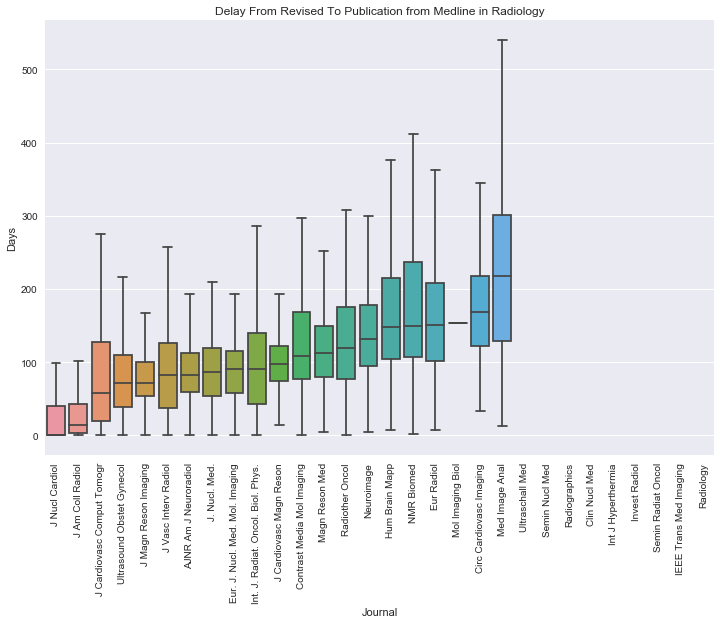

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
g=sns.boxplot(data=df,order=df_journal['Journal'][median_labels],showfliers=False)
g.set(xticklabels=df_journal['Journal'][median_labels])
g.set_xticklabels(g.get_xticklabels(),rotation=90) 
g.set_title('Delay From Revised To Publication from Medline in Radiology')
g.set_ylabel('Days')
fig.savefig('First 30 journals in Radiology or Nuclear Medicine.jpeg')